## Hierarchical clustering

Here, we do not know in advance how many clusters we want. Once the algorithm is run, we end up with a tree-like visual representation of the observations, called a dendrogram, that allows us to view at once the clusterings obtained for each possible number of clusters, from 1 to n.

K-means clustering requires us to pre-specify the number of clusters K which is not a requirement for Hierarchical clustering. Also, it has an added advantage that it results in an attractive tree-based representation of the observations at different scales of clustering, called a dendrogram. 

Bottom-up or agglomerative clustering is the most common type of hierarchical clustering, and refers to the fact that a dendrogram is built starting from the leaves and combining clusters up to the trunk. 


In the image shown below, each leaf of the dendrogram represents an observation. As we move up the tree, some leaves begin to fuse into branches. These correspond to observations that are similar to each other. For any two observations, we can look for the point in the tree where branches containing those two observations are first fused. The height of this fusion, as measured on the vertical axis, indicates how different the two observations are. Thus, observations that fuse at the very bottom of the tree are quite similar to each other, whereas observations that fuse close to the top of the tree will tend to be quite different. 

<img src="../images/dendogram.JPG">

The dashed line represents the cut. The left image is not cut which gives us one cluster for all observations. The middle image is cut in such a way that two clusters are generated. The cut on right image generates 3 clusters. 

## Hierarchical Clustering Algorithm

A dissimilarity measure, most often Euclidean distance, is used between each pair of observations. Starting out at the bottom of the dendrogram, each of the n observations is treated as its own cluster. The two clusters that are most similar to each other are then fused so that there are now n−1 clusters. Next, the two clusters that are most similar to each other are fused again, so that there are now n−2 clusters. The algorithm proceeds in this fashion until all of the observations belong to one single cluster, and the dendrogram is complete.

The concept of dissimilarity between a pair of observations needs to be extended to a pair of groups of observations. This extension is achieved by developing the notion of linkage, which defines the dissimilarity between two groups of observations. The four most common types of linkage are complete, average, single, and centroid. 

----
Generate the data to perform hierarchical clustering

In [19]:
# Set the seed to reproduce the results
set.seed(4)

# Generate a random normal distribution of 100 values. Generate a matrix out of this normal distribution.
x=matrix(rnorm(50*2), ncol=2)

# Add 3 to rows 1 to 25 in first column of the matrix
x[1:25, 1]=x[1:25, 1] + 3

# Subtract 4 from rows 1 to 25 in second column of the matrix
x[1:25, 2]=x[1:25, 2] - 4
x

3.21675486,-4.66374314
2.45750743,-4.62372649
3.89114465,-4.07963243
3.59598058,-3.56437524
4.63561800,-2.02909903
3.68927544,-4.59675867
1.71875337,-4.55250721
2.78685548,-3.30403337
4.89653987,-4.15566396
4.77686321,-2.65110180
3.56660450,-5.06852307


----

The hclust() function is used to implement hierarchical clustering in R. Create matrix x similar to K-Means lab. Use that data to plot the hierarchical clustering dendrogram using complete, single, and average linkage clustering, with Euclidean distance as the dissimilarity measure. 

|        |Linkage Description|
|--------|---------------------------------------------------------------------------------------------------------------------|
|**Complete**|Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities.                                                    |
|**Single**  |Minimal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time.                                                                 |
|**Average** |Mean intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the average of these dissimilarities.                                                    |
|**Centroid**|Dissimilarity between the centroid for cluster A (a mean vector of length p) and the centroid for cluster B. Centroid linkage can result in undesirable inversions.                                                                                  |


Begin by clustering observations using complete linkage. Use dist() function to compute the 50 × 50 inter-observation Euclidean distance matrix.

In [20]:
# 
hc.complete = hclust(dist(x), method="complete")
hc.complete


Call:
hclust(d = dist(x), method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 50 


Perform hierarchical clustering with average and single linkage

In [3]:
hc.average = hclust(dist(x), method ="average")
hc.single = hclust(dist(x), method ="single")

plot the dendrograms obtained using the plot() function. The numbers at the bottom of the plot identify each observation.

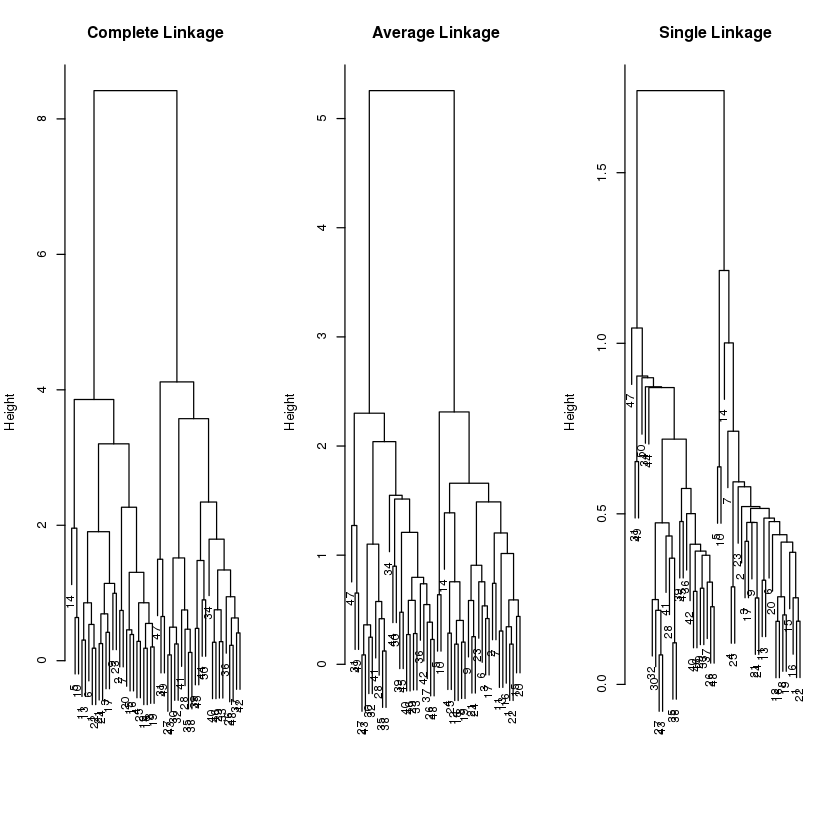

In [4]:
# Arrange 3 plots in a row
par(mfrow =c(1,3))

# Plot all the 3 dendograms generated using different linkage schemes.
plot(hc.complete ,main =" Complete Linkage ", xlab="", sub ="", cex =.9)
plot(hc.average , main =" Average Linkage ", xlab="", sub ="", cex =.9)
plot(hc.single , main=" Single Linkage ", xlab="", sub ="", cex =.9)

To determine the cluster labels for each observation associated with a given cut of the dendrogram, we can use the cutree() function as shown below.

In [5]:
cutree(hc.complete, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [6]:
cutree(hc.average, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

In [7]:
cutree(hc.single, 2)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2

To scale the variables before performing hierarchical clustering of the observations, we use the scale() function.

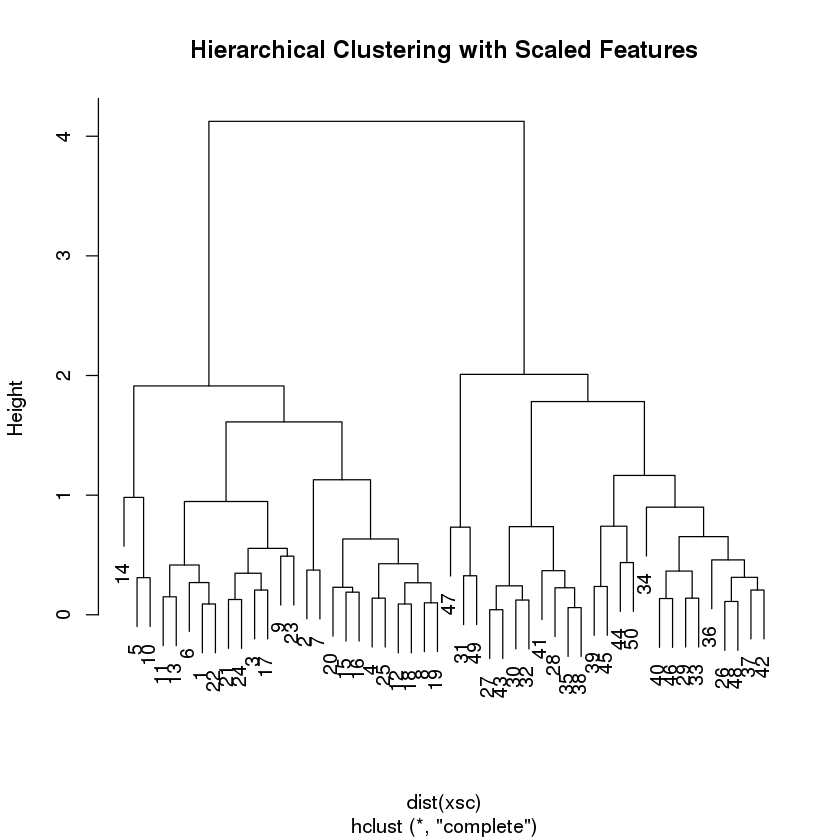

In [8]:
xsc=scale(x)
plot(hclust(dist(xsc), method="complete"), main =" Hierarchical Clustering with Scaled Features ")

Correlation-based distance can be computed using the as.dist() function, which converts an arbitrary square symmetric matrix into a form that the hclust() function recognizes as a distance matrix. However, this only makes sense for data with at least three features since the absolute correlation between any two observations with measurements on two features is always 1. Hence, we will cluster a three-dimensional data set.

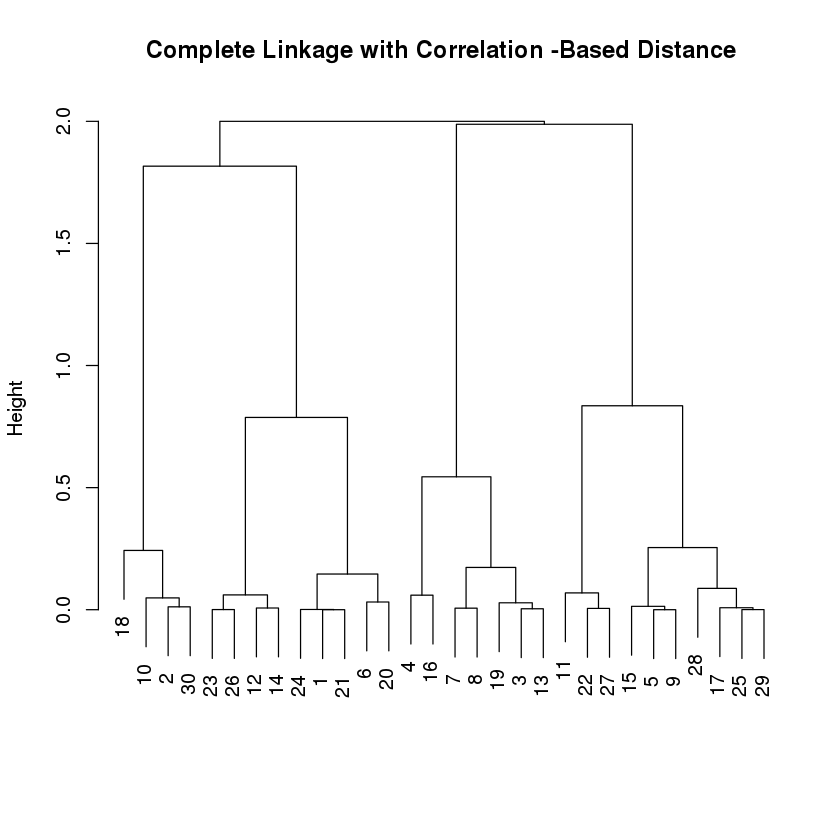

In [9]:
x=matrix(rnorm(30*3), ncol=3)
dd=as.dist(1-cor(t(x)))
plot(hclust(dd, method="complete"), main="Complete Linkage with Correlation -Based Distance ", xlab="", sub ="")

### Divisive Clustering


In [10]:
#install.packages("cluster",repo="https://cran.mtu.edu/")
library(cluster)

Merge:
      [,1] [,2]
 [1,]  -27  -43
 [2,]  -35  -38
 [3,]  -12  -18
 [4,]   -1  -22
 [5,]   -8  -19
 [6,]  -26  -48
 [7,]  -30  -32
 [8,]  -21  -24
 [9,]  -40  -46
[10,]  -29  -33
[11,]   -4  -25
[12,]  -11  -13
[13,]  -37  -42
[14,]   -3  -17
[15,]    4  -16
[16,]  -28    2
[17,]  -39  -45
[18,]    1    7
[19,]   -2  -20
[20,]    5    3
[21,]   15   -6
[22,]   -5  -10
[23,]  -31  -49
[24,]   -9    8
[25,]   16  -41
[26,]    6   10
[27,]  -44  -50
[28,]   17    9
[29,]   20  -15
[30,]   11   29
[31,]   14   24
[32,]   19   -7
[33,]   21   12
[34,]   13  -36
[35,]   26   34
[36,]   33  -23
[37,]   28   27
[38,]   23  -47
[39,]   18   25
[40,]   35  -34
[41,]   22  -14
[42,]   31   30
[43,]   36   32
[44,]   43   42
[45,]   38   37
[46,]   40   39
[47,]   44   41
[48,]   46   45
[49,]   47   48
Order of objects:
 [1]  1 22 16  6 11 13 23  2 20  7  3 17  9 21 24  4 25  8 19 12 18 15  5 10 14
[26] 26 48 29 33 37 42 36 34 27 43 30 32 28 35 38 41 31 49 47 39 45 40 46 44 50
Height:
 [1] 0.

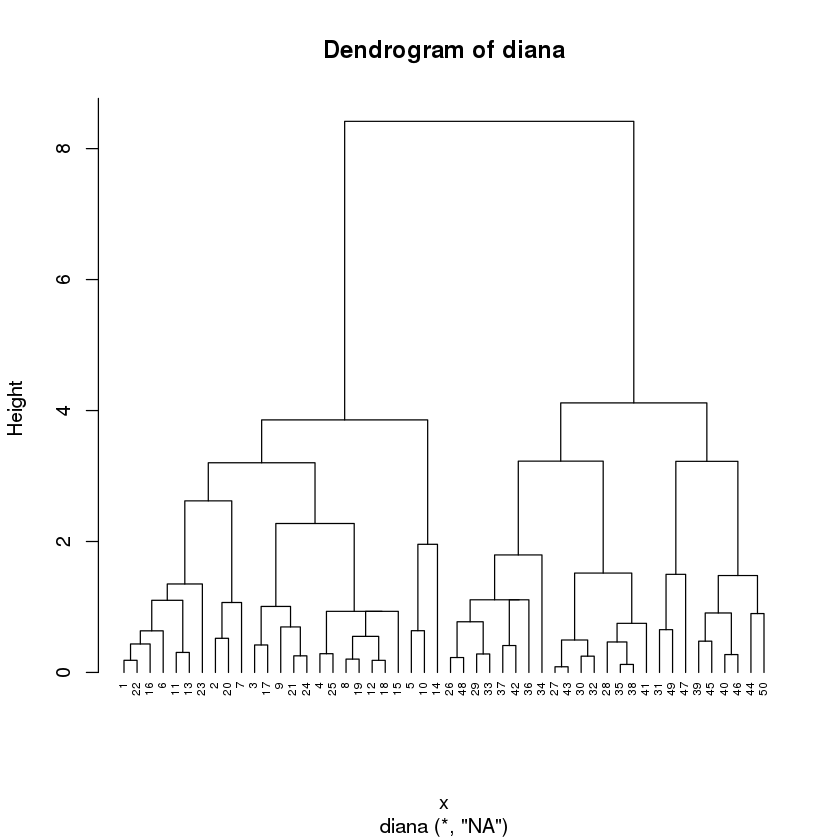

In [15]:
# Compute diana()
# x : could be matrix or data frame, or dissimilarity matrix or object.
# metric: character string specifying the metric to be used for calculating dissimilarities between observations.
# The currently available options are "euclidean" and "manhattan"

res_diana <- diana(x, metric = "euclidean", stand = FALSE)
print(res_diana)
# Plot the tree
pltree(res_diana, cex = 0.6, hang = -1, main = "Dendrogram of diana")

In [17]:
## Cut into 2 groups:
diana2 <- cutree(as.hclust(res_diana), k = 2)

table(diana2) # 8 and 42 group members

rownames(x)[diana2 == 1]

diana2
 1  2 
25 25 

NULL

In [18]:
# Divise coefficient; amount of clustering structure found
res_diana$dc

[1] 0.9381019